# Módulo 5 Preprocesamiento de datos multivariados o de una serie temporal

Autor: Ricardo Ramírez Condado - A01379299

## Preprocesamiento y análisis de datos multivariados o series temporales.

El siguiente notebook mostrará un análisis de serie temporal que posiblemente contenga tendencias y patrones estacionales sobre el tráfico de distintas páginas web a lo largo del tiempo, lo que permitirá analizar tendencias y patrones en el uso de internet.

## 1. Importat librerías
Se colocan las librerías necesarias para realizar los siguientes pasos del análisis.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

## 2. Carga de los Datos
Se cargarán los datos al notebook.

In [8]:
# Se coloca la ruta raíz del archivo a analizar '.csv' con la ruta real del archivo CSV
df = pd.read_csv('train_1.csv')
print(df.head())

                                                Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN         NaN   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-09  ...  2016-12-22  2016-12-23  2016-12-24  

## 3. Preparación de las Series Temporales
Transformamos el DataFrame para que sea adecuado para un análisis de series temporales. Esto implica 'derretir' el DataFrame para convertir las fechas de columnas a valores de una columna y luego convertir esta columna a un tipo de dato datetime. Finalmente, establecemos esta columna como el índice del DataFrame, lo que nos permite analizar las series temporales de manera más efectiva.

In [9]:
import pandas as pd

#Convertir las fechas de columnas en valores de una columna
df_melted = df.melt(id_vars=['Page'], var_name='fecha', value_name='visitas')

# Luego, convierte la columna 'fecha' a un tipo de dato datetime
df_melted['fecha'] = pd.to_datetime(df_melted['fecha'])

# Finalmente, establece la columna 'fecha' como el índice del DataFrame
df_melted.set_index('fecha', inplace=True)

Ahora df_melted es el DataFrame reestructurado ya que los datos csv tienen una estructura que no permite realizar un análisis adecuado.

## 4. Análisis Exploratorio y Verificación de Estacionariedad

Seleccionamos una serie temporal específica para el análisis, en este caso, la página '2NE1_zh.wikipedia.org_all-access_spider'. Realizamos un análisis exploratorio básico para entender la distribución de los datos y luego llevamos a cabo la prueba de Dickey-Fuller aumentada para verificar la estacionariedad de la serie. La estacionariedad es un aspecto crucial en el análisis de series temporales, ya que afecta a cómo modelamos los datos.

In [10]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Ahora que df_melted es el DataFrame con las fechas como índice
# Se selecciona una columna específica para el análisis
# Por ejemplo, para este arcjivo eligiré la página '2NE1_zh.wikipedia.org_all-access_spider'
df_selected = df_melted[df_melted['Page'] == '2NE1_zh.wikipedia.org_all-access_spider']

# Análisis Exploratorio Básico
print(df_selected['visitas'].describe())

# Verificación de la Estacionariedad
resultado_adfuller = adfuller(df_selected['visitas'].dropna())  # Elimina los NaN para la prueba
print(f'ADF Statistic: {resultado_adfuller[0]}')
print(f'p-value: {resultado_adfuller[1]}')

count    550.000000
mean      21.756364
std       29.390758
min        3.000000
25%       11.000000
50%       16.000000
75%       22.000000
max      490.000000
Name: visitas, dtype: float64
ADF Statistic: -8.884037701518485
p-value: 1.294670409024795e-14


Para otros cálculos, manejaré los valores NaN según sea necesario

## 5. Descomposición de la Serie Temporal

Utilizamos la función `seasonal_decompose` para descomponer la serie temporal seleccionada. Esto nos permite observar la tendencia, la estacionalidad y el residuo de manera separada. La visualización de estos componentes nos ayuda a entender mejor las características intrínsecas de la serie temporal.

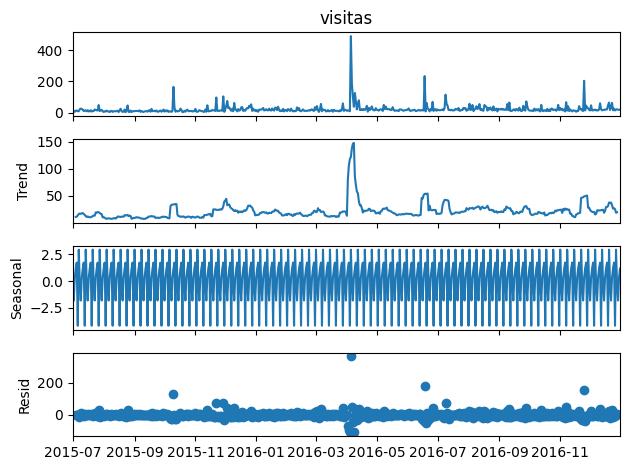

In [11]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 'visitas' es la columna de interés

# Descomposición de la Serie Temporal
descomposicion = seasonal_decompose(df_selected['visitas'].dropna(), model='additive')

# Visualización de la Descomposición
descomposicion.plot()
plt.show()

## 6. Análisis de Autocorrelación

Realizamos un análisis de autocorrelación y autocorrelación parcial para identificar patrones temporales en la serie. Esto es crucial para determinar los parámetros adecuados para un modelo ARIMA, específicamente los valores de p (autocorrelación) y q (autocorrelación parcial).

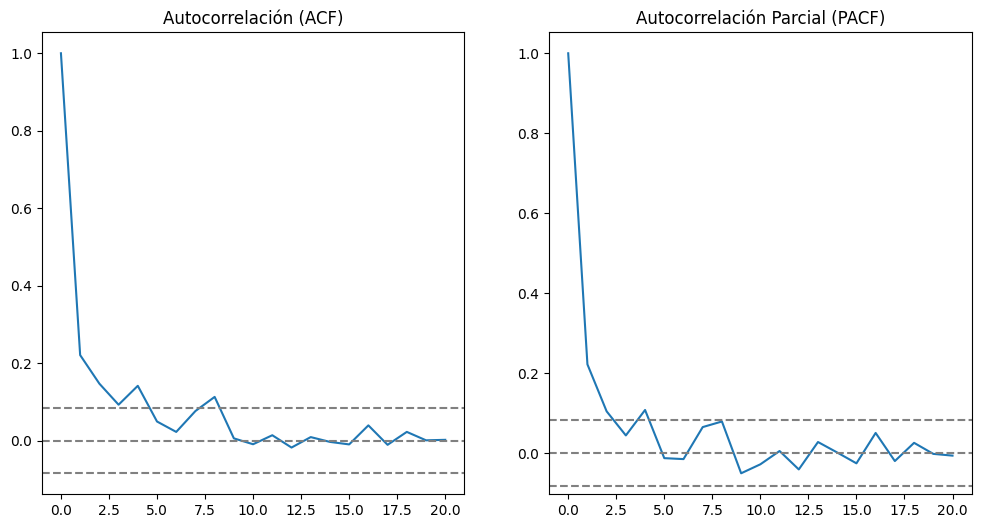

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf


# Calcula ACF y PACF
lag_acf = acf(df_selected['visitas'].dropna(), nlags=20)
lag_pacf = pacf(df_selected['visitas'].dropna(), nlags=20)

# Gráficas de ACF y PACF
plt.figure(figsize=(12, 6))

# ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_selected['visitas'])), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_selected['visitas'])), linestyle='--', color='gray')
plt.title('Autocorrelación (ACF)')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_selected['visitas'])), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_selected['visitas'])), linestyle='--', color='gray')
plt.title('Autocorrelación Parcial (PACF)')

plt.show()

## 7. Visualización de la Serie Temporal

Aquí, visualizamos la serie temporal completa para tener una idea clara del comportamiento de los datos a lo largo del tiempo. Esta visualización es esencial para identificar patrones, tendencias y posibles irregularidades en los datos.

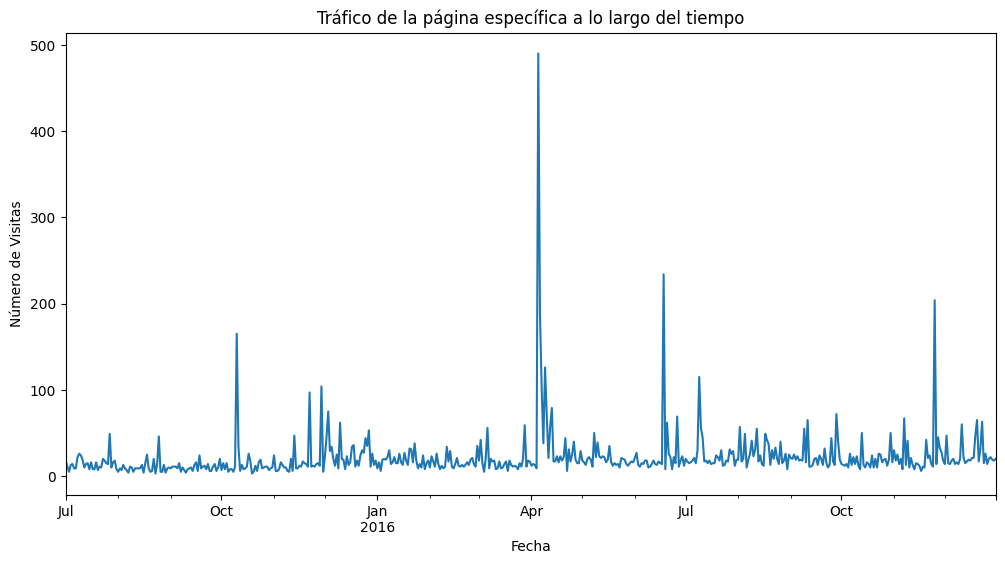

In [13]:
# Visualización de la serie temporal
plt.figure(figsize=(12, 6))
df_selected['visitas'].plot(kind='line')  # Asegúrate de que 'df_selected' es tu serie temporal
plt.title('Tráfico de la página específica a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de Visitas')
plt.show()


## 7.1 Prueba de Dickey-Fuller

Aquí, interpretamos los resultados de la prueba de Dickey-Fuller

In [14]:
# Prueba de Dickey-Fuller aumentada
adf_test = adfuller(df_selected['visitas'].dropna())

# Resultados de la prueba
print(f'Prueba Estadística: {adf_test[0]}')
print(f'P-valor: {adf_test[1]}')
# etc.


Prueba Estadística: -8.884037701518485
P-valor: 1.294670409024795e-14


## 8. Evaluación del Modelo ARIMA

Después de dividir los datos en conjuntos de entrenamiento y prueba, ajustamos un modelo ARIMA y realizamos predicciones. Luego evaluamos el modelo utilizando el error cuadrático medio (MSE) y la raíz del error cuadrático medio (RMSE). Estas métricas nos proporcionan una idea de la precisión del modelo.

In [15]:
from sklearn.metrics import mean_squared_error

# Dividir los datos en conjunto de entrenamiento y prueba
train_size = int(len(df_selected) * 0.8)
train, test = df_selected[0:train_size], df_selected[train_size:]

# Ajustar el modelo ARIMA
model = ARIMA(train['visitas'], order=(1,1,1))
model_fit = model.fit()

# Realizar predicciones
predictions = model_fit.forecast(steps=len(test))

# Evaluar el modelo
mse = mean_squared_error(test['visitas'], predictions)
rmse = np.sqrt(mse)
print('MSE:', mse)
print('RMSE:', rmse)

MSE: 486.13829970481527
RMSE: 22.04854416293319


## 9. Visualización Adicional Post-Descomposición
Realizamos una visualización adicional para examinar más de cerca la tendencia y la estacionalidad después de la descomposición. Esto nos permite entender cómo estos componentes varían con el tiempo y su influencia en la serie temporal.


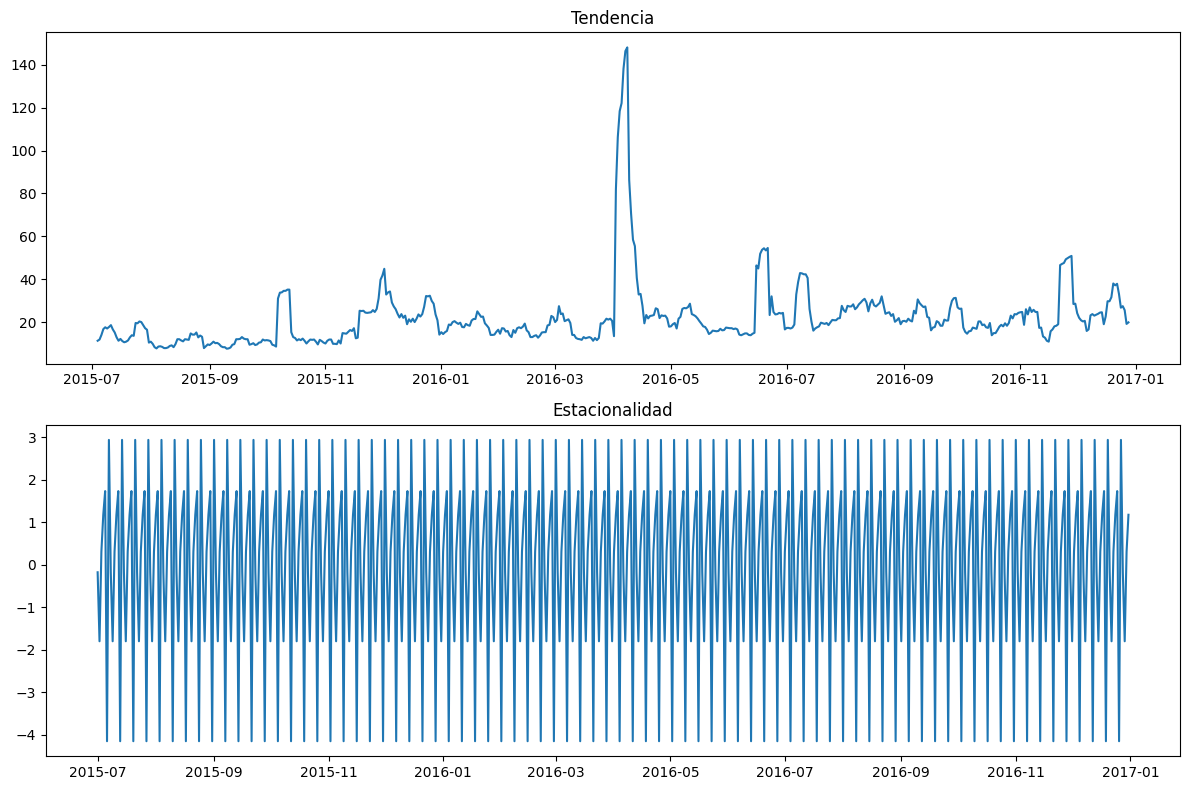

In [16]:
# Visualización de la tendencia y la estacionalidad después de la descomposición
plt.figure(figsize=(12, 8))

# Tendencia
plt.subplot(211)
plt.plot(descomposicion.trend)
plt.title('Tendencia')

# Estacionalidad
plt.subplot(212)
plt.plot(descomposicion.seasonal)
plt.title('Estacionalidad')

plt.tight_layout()
plt.show()

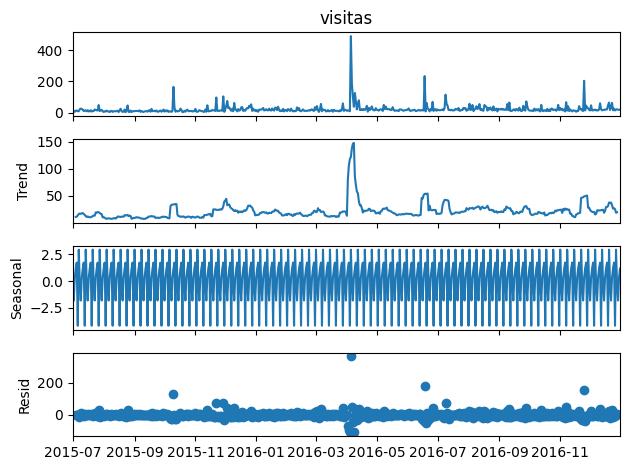

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición de la Serie Temporal
descomposicion = seasonal_decompose(df_selected['visitas'].dropna(), model='additive')

# Visualización
descomposicion.plot()
plt.show()

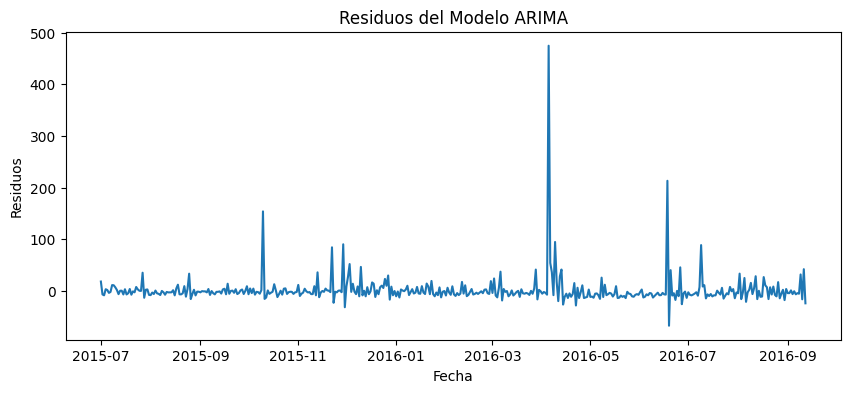

In [18]:
#'model_fit' es tu modelo ARIMA ajustado
residuos = model_fit.resid

# Visualización de los residuos
plt.figure(figsize=(10,4))
plt.plot(residuos)
plt.title('Residuos del Modelo ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Residuos')
plt.show()

RMSE: 22.380279131767082


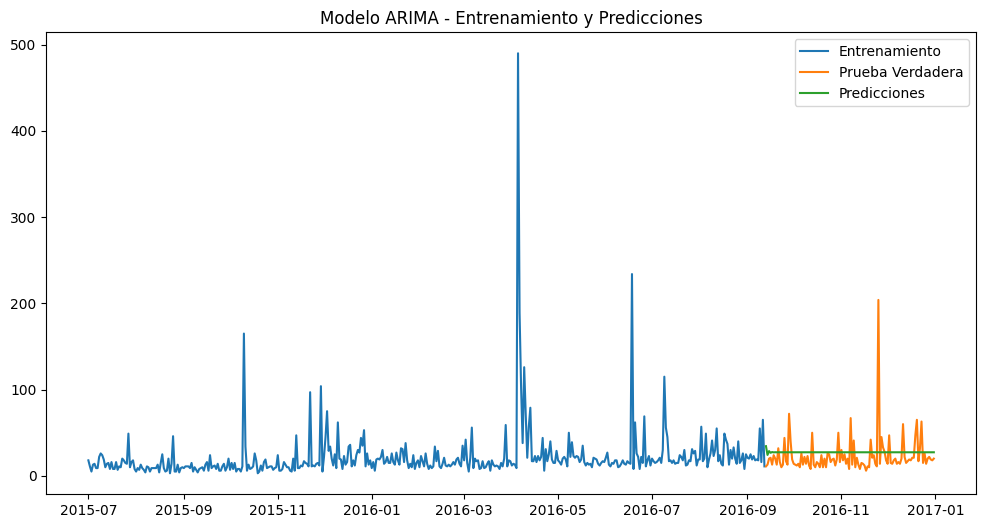

In [21]:
# Dividir los datos en conjunto de entrenamiento y prueba
train_size = int(len(df_selected['visitas']) * 0.8)
train, test = df_selected['visitas'][0:train_size], df_selected['visitas'][train_size:]

# Ajustar el modelo ARIMA en el conjunto de entrenamiento
p, d, q = 1, 1, 0  # Estos valores se ajustan según tu análisis ACF y PACF

model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()


# Realizar predicciones
predictions = model_fit.forecast(steps=len(test))

# Calcular el RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))
print('RMSE:', rmse)

# Graficar los resultados
plt.figure(figsize=(12,6))
plt.plot(train, label='Entrenamiento')
plt.plot(test, label='Prueba Verdadera')
plt.plot(test.index, predictions, label='Predicciones')
plt.legend(loc='best')
plt.title('Modelo ARIMA - Entrenamiento y Predicciones')
plt.show()

#### Interpretación de los Resultados del Modelo ARIMA

La gráfica final muestra el desempeño del modelo ARIMA en la tarea de predecir el tráfico de la página de Wikipedia seleccionada. Aquí, podemos observar tres series distintas:

- **Entrenamiento (en azul):** Representa los datos históricos utilizados para entrenar el modelo. La serie azul muestra la variabilidad y cualquier tendencia o patrones en los datos hasta el punto de división entre el conjunto de entrenamiento y de prueba.

- **Prueba Verdadera (en naranja):** Esta serie ilustra los datos reales durante el período de prueba. Son esenciales para evaluar qué tan bien el modelo ha generalizado lo aprendido durante la fase de entrenamiento y cómo se desempeña con datos no vistos previamente.

- **Predicciones (en verde):** Son las proyecciones del modelo basadas en el aprendizaje obtenido de los datos de entrenamiento. Idealmente, estas deberían seguir de cerca la serie de prueba verdadera.

Al analizar la gráfica, se nota que mientras el modelo sigue la tendencia general de los datos de entrenamiento, hay una discrepancia evidente entre las predicciones y los datos reales durante el período de prueba. Esta diferencia se destaca particularmente en los picos y valles, donde las predicciones no capturan los aumentos o disminuciones significativos en el tráfico de la página.

El **Root Mean Square Error (RMSE)**, una medida de la diferencia promedio entre los valores predichos y los valores reales, será crucial para cuantificar el rendimiento del modelo. Un RMSE alto en comparación con la magnitud de los datos podría indicar que el modelo no está realizando predicciones precisas.

La presencia de picos pronunciados en la serie temporal sugiere que podrían existir factores externos o eventos específicos que causan estos aumentos en el tráfico y que no son capturados por el modelo ARIMA. Por lo tanto, se podría considerar la inclusión de variables externas o eventos indicadores en el modelo, o explorar modelos más complejos como SARIMA, que también captura la estacionalidad, o modelos de aprendizaje automático que pueden manejar múltiples características de manera más efectiva.

#### Pasos a seguir para mejoras futuras:

- **Ajuste de Parámetros:** Se considerará ajustar los parámetros del modelo ARIMA basándose en un análisis más detallado de ACF y PACF, y utilizando criterios de información como AIC y BIC para comparar modelos.
- **Incorporación de Estacionalidad y Variables Externas:** Si la serie temporal muestra patrones estacionales o si eventos específicos pueden influir en el tráfico, se explorará la incorporación de estos elementos en el modelo.
- **Análisis de Anomalías:** Se investigarán los picos anómalos para comprender mejor su naturaleza y cómo pueden ser modelados adecuadamente.
- **Validación Cruzada:** Se implementarán métodos de validación cruzada para series temporales, lo que podría proporcionar una evaluación más robusta del rendimiento del modelo.

Estos pasos ayudarán a mejorar el modelo actual y a asegurar que las predicciones sean lo más precisas posible para aplicaciones prácticas como la planificación de recursos y la estrategia de contenido.


Reflexiones para Mejoras Futuras:

- **Revisión de Parámetros**: Consideraré revisar y ajustar los parámetros p, d y q de mi modelo ARIMA, basándome en un análisis más detallado de las funciones de autocorrelación.
- **Incorporación de Estacionalidad**: Si identifico patrones estacionales en mis datos, podría explorar la inclusión de términos estacionales en mi modelo, quizás moviéndome hacia un modelo SARIMA.
- **Exploración de Otras Metodologías**: Investigaré otros modelos y técnicas estadísticas que podrían capturar mejor la estructura intrínseca de mis datos de series temporales.
- **Transformaciones de Datos**: Exploraré otras transformaciones de los datos, como transformaciones logarí


## Interpretación de las Pruebas Estadísticas y Justificación de los Parámetros ARIMA

## Interpretación de la Prueba de Dickey-Fuller Aumentada
La estadística de prueba de `-8.884037701518485` es mucho más baja que cualquier valor crítico común para niveles de confianza del 90%, 95%, o 99% (que suelen estar alrededor de `-2.57`, `-2.86` y `-3.44` respectivamente). Esto implica que podemos rechazar la hipótesis nula de que la serie tiene una raíz unitaria y, por lo tanto, no es estacionaria. El p-valor extremadamente pequeño de `1.294670409024795e-14` refuerza esta conclusión, indicando que la probabilidad de obtener una estadística de prueba tan extrema bajo la hipótesis nula es prácticamente cero.

## Interpretación de los gráficos ACF y PACF
**Autocorrelación (ACF)**: La gráfica muestra una disminución rápida hacia cero, lo que sugiere que no es necesario un término MA adicional después del primero, ya que la autocorrelación dentro de la serie se atenúa rápidamente.

**Autocorrelación Parcial (PACF)**: La caída significativa después del primer lag seguida de lags que se mantienen dentro de los límites de confianza indica que un solo término AR es suficiente para el modelo ARIMA.

## Selección de Parámetros para ARIMA
Con base en los resultados de la prueba de Dickey-Fuller y los gráficos ACF y PACF, seleccionamos los parámetros p, d y q para nuestro modelo ARIMA como sigue:

- **p (autoregresivo)**: Elegimos `p=1` debido a que el primer lag en el PACF es significativo y los subsiguientes no lo son, lo que sugiere un modelo AR de orden 1.
- **d (diferenciación)**: Optamos por `d=1` ya que la prueba de Dickey-Fuller indica que la serie es estacionaria después de una diferenciación.
- **q (media móvil)**: Seleccionamos `q=0` porque el ACF después del primer lag cae dentro de la zona de no significancia, lo que indica que no hay autocorrelaciones significativas en los residuos que requieran un término MA adicional.

## Conclusión
El modelo ARIMA(1,1,0) es adecuado para nuestro conjunto de datos porque la prueba de Dickey-Fuller confirma que la serie diferenciada es estacionaria y el análisis ACF y PACF sugiere que un modelo con un término AR y una diferenciación es suficiente para capturar la autocorrelación en los datos. Este modelo nos proporcionará una base para realizar predicciones de tráfico de páginas web y comprender las dinámicas de la serie temporal.

Mientras continuamos modelando, estaremos atentos a los patrones estacionales que puedan surgir en análisis más detallados, lo cual podría llevarnos a considerar un modelo SARIMA si es necesario. También vigilaremos la aparición de cualquier punto atípico que pueda influir en la precisión de nuestras predicciones y consideraremos su inclusión como eventos externos o variables dummy en el modelo.
